# Goodness of Fit Test template
### We use scipy.stats packages to perform K-S test for fitting distributions to data

In [37]:
#Some usefule packages
#Run this Cell
import matplotlib.pyplot as plt
import scipy
import scipy.stats
import numpy as np

In [38]:
#The distribution fitting steps using KS test & AD Test is written as a function
#This is a template code. DO NOT MODIFY THIS CELL. Just run this cell.

def MyFit(dataseries, distribution_name):#, plt):

    #Get distribution details from scipy
    distribution = getattr(scipy.stats, distribution_name)

    #Do MLE using the predefined .fit() function to find parameter values
    param = distribution.fit(dataseries)
    print('Fitted: ', distribution_name, ' with parameters ', param)

    #Do KS TEST using predefined kstest() function from scipy.stats package
    D, pval = scipy.stats.kstest(dataseries, distribution_name, args= param)

    print('\nKS Test')
    print('KS Test Statistics: ', D)
    if pval > 0.05:
        print('p-value is ', pval, '. Do not reject null hypothesis')
    else:
        print('p-value is ', pval, '. Reject null hypothesis')

    #Do ANDERSONDARLING TEST using anderson() funciton from scipy.stats package.
    #Works only for a few distributions
    print('\n\nAnderson-Darling Test')
    possibledist = ['norm', 'expon', 'logistic', 'gumbel', 'gumbel_l', 'gumbel_r', 'extreme1']
    if distribution_name in possibledist:
      A, c_val, pvalA = scipy.stats.anderson(dataseries, distribution_name)
      print("Statistics", A, "; criticalValues: ", c_val, "; significanceLevel: ", pvalA)
      #A= 1.2
      if all(i < A for i in c_val):
        print('Test Statistics ', A, ' is more than all critical values. Reject H0')
      else:
        print('Test Statistics ', A, ' is less than some critical values. Cannot Reject H0')
    else:
      print('The given distribution cannot be tested with A-D test. A-D Test in Scipy is currently only for "norm", "expon", "logistic", "gumbel", "gumbel_l", "gumbel_r", "extreme1", "weibull_min"')

    #PLOT DATA AS HISTOGRAM along with the theoretical curve
    plt.figure(figsize=(10,5))
    plt.hist(dataseries,  bins=int(len(dataseries)/2),  density=True, alpha=0.8, color='g')
    xmin, xmax = plt.xlim()

    x = np.linspace(xmin, xmax, 100)
    prob = distribution.pdf(x,*param[:-2], loc=param[-2], scale=param[-1])

    plt.plot(x, prob, label=distribution_name)
    plt.legend(loc='upper right')
    plt.show()
    return

# Using the above function

In below cells, you can import your dataset and fit the distributions you want.
The list of the names of the distributions are available at https://docs.scipy.org/doc/scipy/reference/stats.html. you need to use the EXACT same name. For example, it is 'expon' for Exponential distribution, 'norm' for Normal, etc.

In [39]:
# Open and reading data file. Assumed there is a single column of data.
try:
  f1 = open('MTTF.txt', 'r')
except(FileNotFoundError):
  print("File not found. Upload the file in Files tab on the left side")

In [40]:
flines= f1.readlines()
f1.close()

#Extract the data values
mydata=[]
for fnum in flines:
    mydata.append(float(fnum))

print(np.mean(mydata))

#Call the MyFit() function with the name of the Distribution you want to test the fit
# MyFit(mydata, 'expon')
# MyFit(mydata,'laplace')
# MyFit(mydata, 'norm')
# MyFit(mydata, 'rayleigh')
# MyFit(mydata,'weibull_min')
# MyFit(mydata,'weibull_max')


10.812379999999997


In [3]:
MyFit(mydata, 'gengamma')
MyFit(mydata,'gamma')

NameError: name 'MyFit' is not defined

Fitted:  gamma  with parameters  (np.float64(0.45029347300678385), np.float64(0.0019999999999999996), np.float64(50.14187416785643))

KS Test
KS Test Statistics:  0.3170410033034935
p-value is  5.7367865802465686e-05 . Reject null hypothesis


Anderson-Darling Test
The given distribution cannot be tested with A-D test. A-D Test in Scipy is currently only for "norm", "expon", "logistic", "gumbel", "gumbel_l", "gumbel_r", "extreme1", "weibull_min"


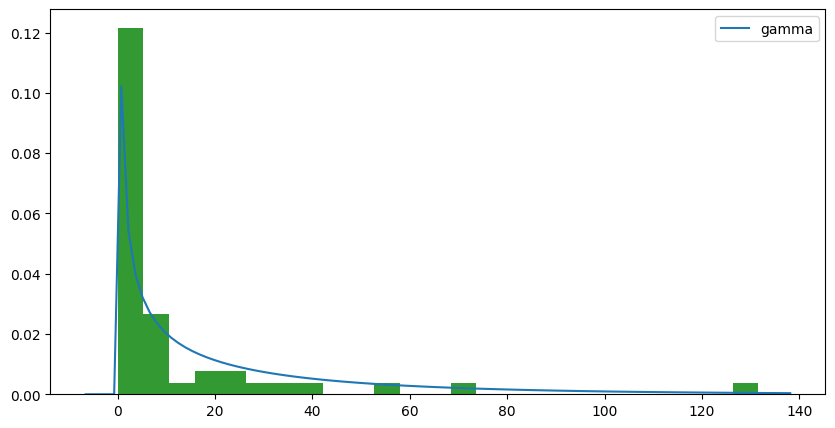

In [52]:
# Open and reading data file. Assumed there is a single column of data.
try:
  f1 = open('arrivaltimes.txt', 'r')
except(FileNotFoundError):
  print("File not found. Upload the file in Files tab on the left side")

flines= f1.readlines()
f1.close()

#Extract the data values
mydata=[]
for i in range(0,501):
     mydata.append(float(flines[i]))
# print((mydata))


mydata2=[]
mydata2.append(float(0))
for i in range(1,501):
     mydata2.append((mydata[i] - mydata[i-1]))

print((mydata2))

[0.0, 11.922721434811056, 3.370674826755309, 2.572840801170507, 8.014336818146873, 12.710709354874425, 5.50097535778977, 39.50982068814719, 11.546422737517247, 6.55720193410869, 4.977737022017507, 4.203422502573986, 13.058198970076575, 5.772721768030294, 0.6153279923239836, 5.075713502135159, 13.393932400008737, 2.014942606086805, 1.9291962583497764, 7.58328839328783, 7.589186472692745, 10.06218061263678, 18.933391019588555, 12.890055033202344, 9.442363759500381, 12.81730339832302, 3.9002331936359553, 4.490857897120151, 2.5911175974288483, 3.4773509004921266, 9.96893932033501, 0.9662647968660849, 5.686333766388941, 5.63633684709913, 6.805964666063517, 5.548302648562924, 3.743461977002255, 5.5573810306749465, 22.385701131034182, 28.852651465287806, 6.9682729565302, 9.780410152076513, 1.2286662971685018, 3.8167848895762404, 5.358464022843634, 20.12225292982083, 2.8828941070633505, 6.597786818396457, 42.377382987235876, 7.32897081768931, 9.490580798373742, 1.2854801998110474, 17.506605239

Fitted:  expon  with parameters  (0.0, 9.856680215881868)

KS Test
KS Test Statistics:  0.026102260405753808
p-value is  0.8753583323384724 . Do not reject null hypothesis


Anderson-Darling Test
Statistics inf ; criticalValues:  [0.921 1.077 1.339 1.604 1.955] ; significanceLevel:  [15.  10.   5.   2.5  1. ]
Test Statistics  inf  is more than all critical values. Reject H0


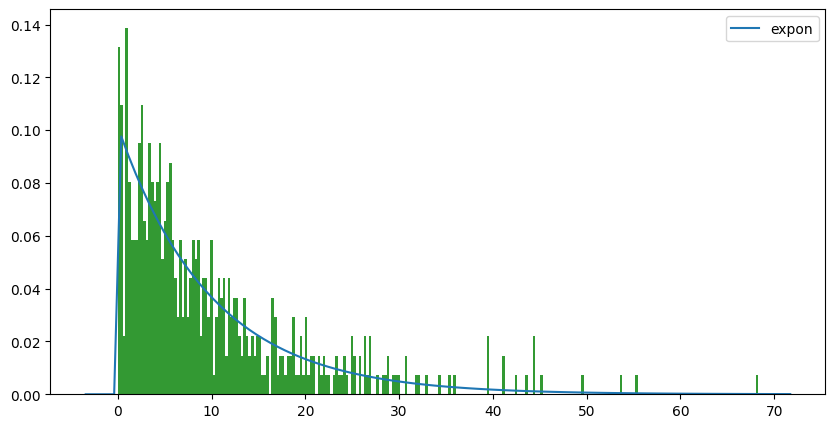

In [53]:
MyFit(mydata2, 'expon')